Формулировка задачи:  
Задача заключается в создании графа, где узлами являются сотрудники, а ребрами — отношения взаимодействия между ними (например, частота общения, уровень сотрудничества и т.д.). Оптимизация взаимодействия будет заключаться в нахождении наиболее эффективных маршрутов или узловых точек, способствующих повышению продуктивности работы команды.

Признаки для решения задачи:
1. Частота взаимодействия - сколько раз сотрудник взаимодействует с другими.
2. Уровень сотрудничества - оценка на основе совместных проектов или задач.
3. Удаленные/Офисные сотрудники - статус сотрудников; важно для понимания формата взаимодействия.
4. Эффективность общения - основанная на отзывах о совместной работе или результатах.
5. Позиция в организации - роль и уровень в иерархии, что может влиять на взаимодействие.

Набор данных:
- Список сотрудников с уникальными идентификаторами.
- Матрица взаимодействий, в которой строки и столбцы соответствуют сотрудникам, а значения показывают уровень взаимодействия (например, от 0 до 10).
- Дополнительные колонки с признаками: удаленный статус, позиция в компании и оценка сотрудничества.

Задача определить исполнителя для входящих задач на основе данных об их текущей нагрузке.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def make_complete(G):
    for node, degree in G.degree:
        if degree == 0:
            G.add_edge(node, np.random.randint(0, 101))
    return G

In [90]:
# G = nx.dense_gnm_random_graph(n=100, m=250)
# G = nx.barabasi_albert_graph(100, 3, seed=42)
G = nx.newman_watts_strogatz_graph(100, 10, p=0.5, seed=42)
G = make_complete(G)

In [91]:
for u, v, data in G.edges(data=True):
    data['weight'] = np.random.randint(1, 101)

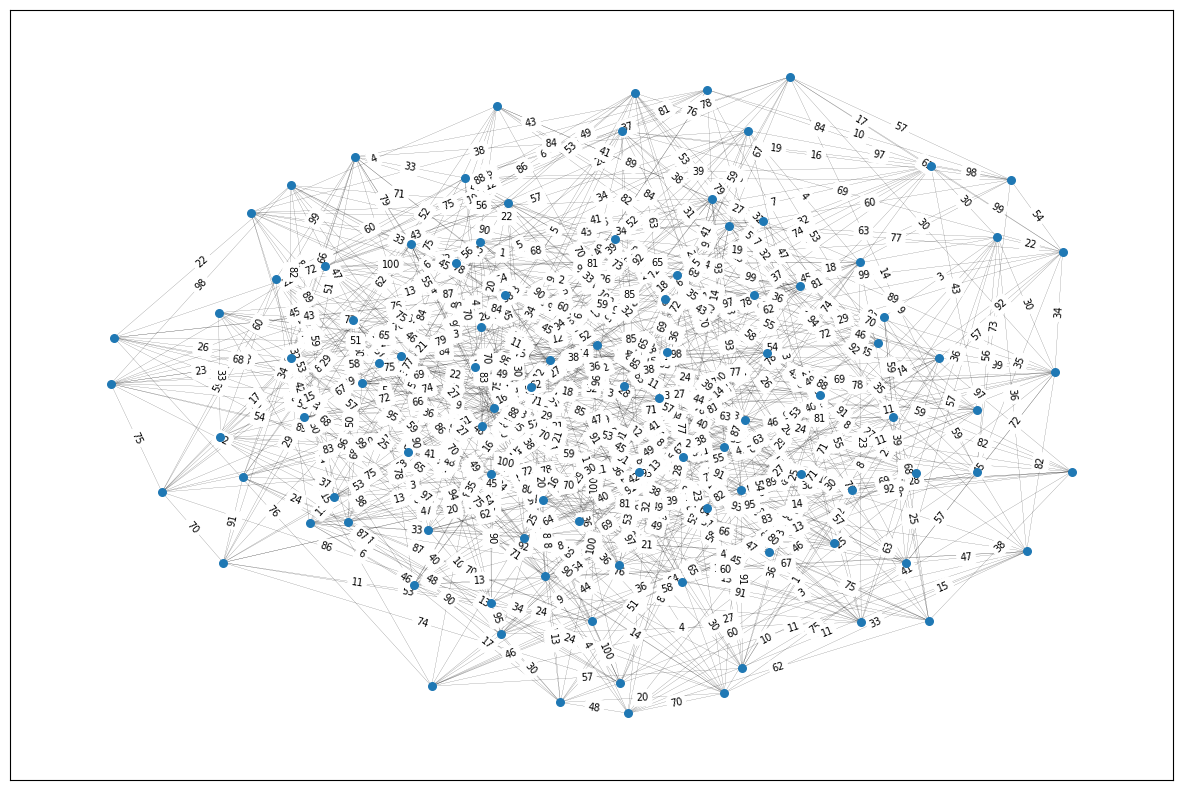

In [92]:
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, k=5, seed=42)
nx.draw_networkx_nodes(G, pos=pos, node_size=30, ax=ax)
nx.draw_networkx_edges(G, pos=pos, ax=ax, width=0.1)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=dict(nx.get_edge_attributes(G, 'weight')), font_size=7, ax=ax);

In [93]:
num_edges = len(G.edges)
importances = dict(G.degree())
for node, degree in importances.items():
    importances[node] = degree / num_edges

nx.set_node_attributes(G, importances, name='importances')

In [94]:
len(nx.algorithms.approximation.min_weighted_vertex_cover(G))

99

In [95]:
# Степенная центральность
degree_centrality = nx.degree_centrality(G)
print("Степенная центральность:", degree_centrality)

# Посредническая центральность
betweenness_centrality = nx.betweenness_centrality(G)
print("Посредническая центральность:", betweenness_centrality)

# Центральность близости
closeness_centrality = nx.closeness_centrality(G)
print("Центральность близости:", closeness_centrality)

# Коэффициент кластеризации
clustering_coefficient = nx.clustering(G)
print("Коэффициент кластеризации:", clustering_coefficient)

# Плотность графа
density = nx.density(G)
print("Плотность графа:", density)

# Диаметр графа
diameter = nx.diameter(G)
print("Диаметр графа:", diameter)

# Радиус графа
radius = nx.radius(G)
print("Радиус графа:", radius)

# Средняя длина пути
avg_path_length = nx.average_shortest_path_length(G)
print("Средняя длина пути:", avg_path_length)

Степенная центральность: {0: 0.17171717171717174, 1: 0.17171717171717174, 2: 0.15151515151515152, 3: 0.16161616161616163, 4: 0.13131313131313133, 5: 0.18181818181818182, 6: 0.15151515151515152, 7: 0.14141414141414144, 8: 0.16161616161616163, 9: 0.17171717171717174, 10: 0.16161616161616163, 11: 0.13131313131313133, 12: 0.16161616161616163, 13: 0.13131313131313133, 14: 0.13131313131313133, 15: 0.13131313131313133, 16: 0.15151515151515152, 17: 0.16161616161616163, 18: 0.13131313131313133, 19: 0.14141414141414144, 20: 0.18181818181818182, 21: 0.14141414141414144, 22: 0.12121212121212122, 23: 0.14141414141414144, 24: 0.14141414141414144, 25: 0.15151515151515152, 26: 0.16161616161616163, 27: 0.18181818181818182, 28: 0.15151515151515152, 29: 0.15151515151515152, 30: 0.14141414141414144, 31: 0.20202020202020204, 32: 0.14141414141414144, 33: 0.20202020202020204, 34: 0.13131313131313133, 35: 0.14141414141414144, 36: 0.12121212121212122, 37: 0.15151515151515152, 38: 0.15151515151515152, 39: 0.141

In [96]:
# Compute the edge bottleneck coefficients
edge_bottlenecks = {}
for u, v, data in G.edges(data=True):
    # Compute the minimum cut using maximum flow
    edge_cut_value, edge_partition = nx.minimum_cut(G, u, v, capacity='weight')
    # Compute the bottleneck value for the edge
    edge_bottleneck = edge_cut_value / data['weight']
    edge_bottlenecks[(u, v)] = edge_bottleneck

print("Edge bottleneck coefficients:", edge_bottlenecks)

Edge bottleneck coefficients: {(0, 1): 39.26315789473684, (0, 99): 44.375, (0, 2): 80.0, (0, 98): 7.833333333333333, (0, 3): 116.16666666666667, (0, 97): 74.55555555555556, (0, 4): 6.901234567901234, (0, 96): 10.81159420289855, (0, 5): 9.946666666666667, (0, 95): 19.63157894736842, (0, 35): 13.087719298245615, (0, 17): 24.06451612903226, (0, 54): 7.5353535353535355, (0, 11): 26.714285714285715, (0, 64): 74.6, (0, 28): 10.219178082191782, (0, 67): 13.018181818181818, (1, 2): 720.0, (1, 3): 17.871794871794872, (1, 99): 7.244897959183674, (1, 4): 6.654761904761905, (1, 98): 35.94117647058823, (1, 5): 28.807692307692307, (1, 97): 18.135135135135137, (1, 6): 10.121621621621621, (1, 96): 7.565656565656566, (1, 57): 105.85714285714286, (1, 20): 31.208333333333332, (1, 19): 13.883720930232558, (1, 40): 23.40625, (1, 85): 15.777777777777779, (1, 91): 16.166666666666668, (1, 92): 8.216216216216216, (2, 3): 174.25, (2, 4): 6.9875, (2, 5): 12.631578947368421, (2, 99): 9.102564102564102, (2, 6): 25

In [108]:
nx.set_edge_attributes(G, edge_bottlenecks, 'bottleneck')

In [98]:
pos2 = nx.spring_layout(G, weight='weight')

In [ ]:
[edge_colors[edge] for edge in G.edges]

(array([697.,  25.,  10.,   5.,   2.,   0.,   0.,   1.,   1.,   3.]),
 array([  5.44 ,  76.896, 148.352, 219.808, 291.264, 362.72 , 434.176,
        505.632, 577.088, 648.544, 720.   ]),
 <BarContainer object of 10 artists>)

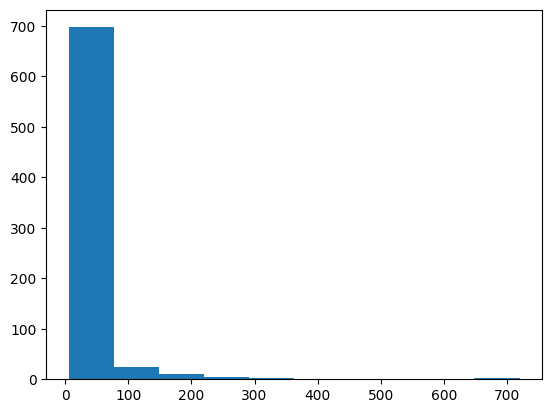

In [121]:
plt.hist(edge_bottlenecks.values())

In [115]:
np.median(edge_colors)

13.409160073037127

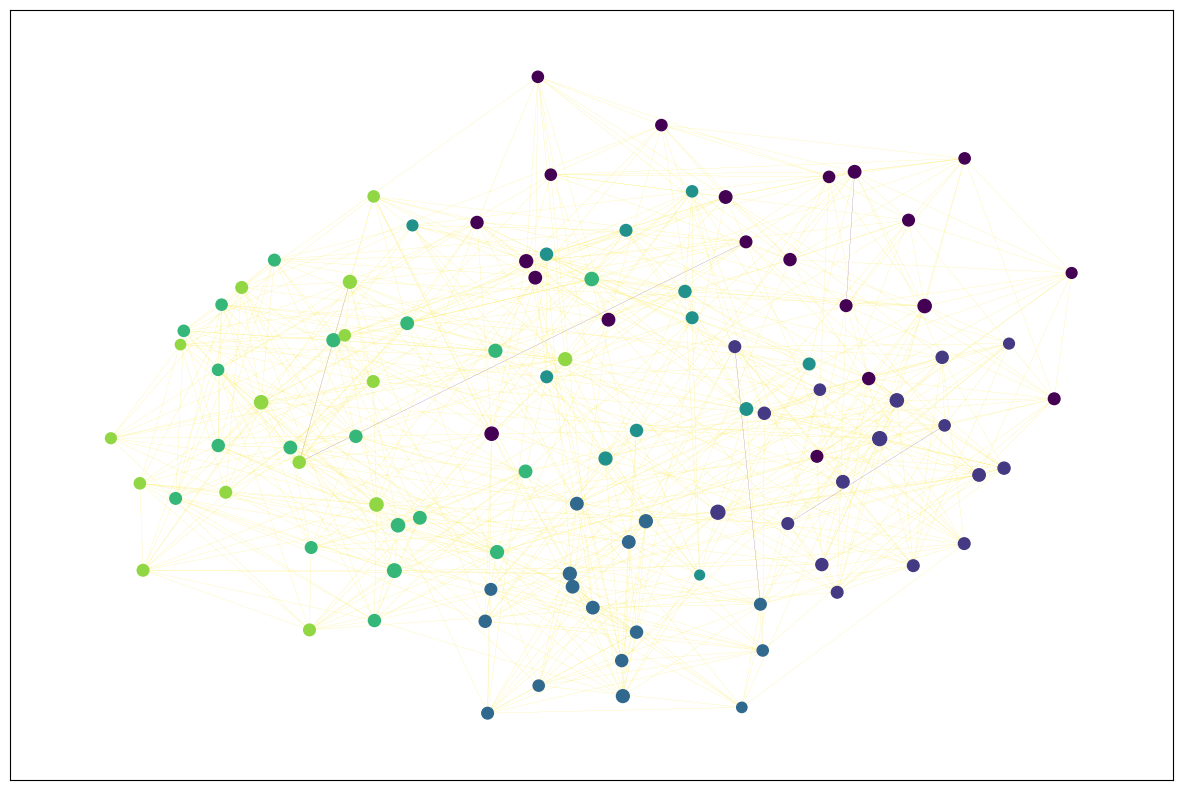

In [138]:
partition = nx.algorithms.community.louvain_communities(G)
partition_dict = {node: i_part for i_part, com in enumerate(partition) for node in com}

color_map = plt.get_cmap('viridis')
colors = color_map([idx / len(partition) for idx, com in enumerate(partition)])
node_colors = [colors[partition_dict[node]] for node in G.nodes]
edge_colors = nx.get_edge_attributes(G, 'bottleneck')
mean = np.mean(list(edge_colors.values())) * 100
edge_colors = [0 if edge_colors[edge] > 400 else 1000 for edge in G.edges]

node_size = [degree * 5 for node, degree in G.degree]

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos2, nodelist=G.nodes, node_size=node_size, node_color=node_colors, cmap=color_map)
nx.draw_networkx_edges(G, pos2, width=0.1, edge_color=edge_colors)
plt.show()

In [142]:
for b in list(nx.bridges(G, 0)):
    print(b)